# Sources
https://freesound.org/people/NoiseCollector/sounds/7784/

Mean frequency: 517.79 Hz
Peak frequency: 680.00 Hz
Energy above or below (negative if below): -851.60
Mean frequency outside carrier: 517.79 Hz


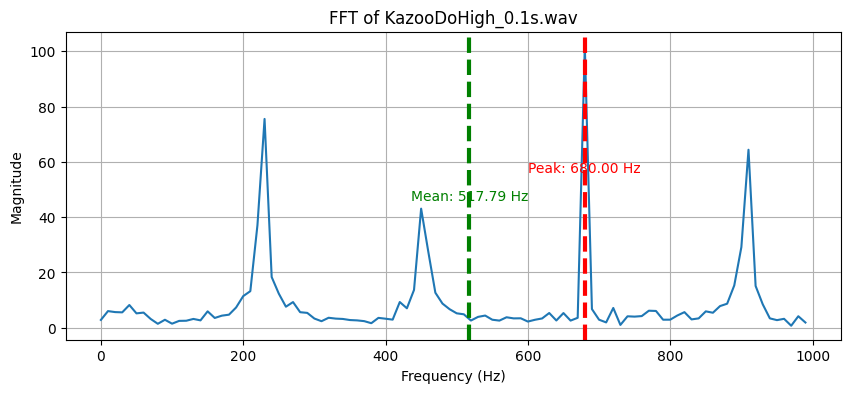

Mean frequency: 560.26 Hz
Peak frequency: 330.00 Hz
Energy above or below (negative if below): -1104.94
Mean frequency outside carrier: 560.26 Hz


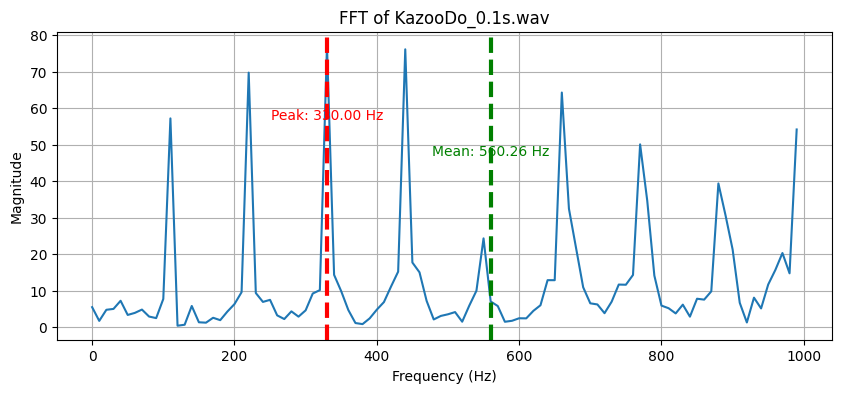

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

FFT_MAX_FREQ = 1000
CARRIER_FREQ = 2000
CARRIER_FREQ_WIDTH = 500 # 500 Hz on either side of the carrier frequency
input_files = ['KazooDoHigh_0.1s.wav', 'KazooDo_0.1s.wav']

for filename in input_files:
    sample_rate, data = wavfile.read(filename)
    # Convert to mono by averaging channels if needed
    if len(data.shape) == 2:
        data = data.mean(axis=1)

    # Normalize 16-bit PCM data to the range [-1, 1]
    data = data / 2**15

    # Perform FFT
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(fft_result), 1 / sample_rate)

    # Take the positive half of the spectrum
    positive_freqs = frequencies[:len(frequencies)//2]
    positive_magnitudes = np.abs(fft_result[:len(fft_result)//2])

    # Remove samples above the maximum frequency
    positive_freqs = positive_freqs[positive_freqs < FFT_MAX_FREQ]
    positive_magnitudes = positive_magnitudes[:len(positive_freqs)]

    # Calculate the average/mean frequency
    mean_freq = np.sum(positive_freqs * positive_magnitudes) / np.sum(positive_magnitudes)
    print(f'Mean frequency: {mean_freq:.2f} Hz')

    # Calculate the peak frequency
    peak_freq = positive_freqs[np.argmax(positive_magnitudes)]
    print(f'Peak frequency: {peak_freq:.2f} Hz')
    
    # Calculate if there is more energy above or below the carrier frequency
    carrier_index = np.argmin(np.abs(positive_freqs - CARRIER_FREQ))
    energy_below_carrier = np.sum(positive_magnitudes[:carrier_index])
    energy_above_carrier = np.sum(positive_magnitudes[carrier_index:])
    print(f'Energy above or below (negative if below): {energy_above_carrier - energy_below_carrier:.2f}')
    
    # Calculate the average frequency outside the carrier frequency
    outside_carrier_indices = np.where(
        (positive_freqs < CARRIER_FREQ - CARRIER_FREQ_WIDTH) |
        (positive_freqs > CARRIER_FREQ + CARRIER_FREQ_WIDTH))
    outside_carrier_freqs = positive_freqs[outside_carrier_indices]
    outside_carrier_magnitudes = positive_magnitudes[outside_carrier_indices]
    mean_outside_carrier_freq = np.sum(outside_carrier_freqs * outside_carrier_magnitudes) / np.sum(outside_carrier_magnitudes)
    print(f'Mean frequency outside carrier: {mean_outside_carrier_freq:.2f} Hz')

    # Plot the results
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, positive_magnitudes)

    plt.axvline(
        mean_freq,
        color = 'g',
        linestyle = '--',
        linewidth = 3)
    plt.text(
        mean_freq,
        50,
        f'Mean: {mean_freq:.2f} Hz',
        verticalalignment = 'top',
        horizontalalignment = 'center',
        color = 'g')

    plt.axvline(
        peak_freq,
        color = 'r',
        linestyle = '--',
        linewidth = 3)
    plt.text(
        peak_freq,
        60,
        f'Peak: {peak_freq:.2f} Hz',
        verticalalignment = 'top',
        horizontalalignment = 'center',
        color = 'r')

    plt.title(f'FFT of {filename}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()